# Un poco de Estadística

Ahora vamos a ver como utilizar todo lo que hemos aprendido hasta ahora para hacer un programa de *predicción*. Primero que nada, recordemos que este programa va a **aprender** de datos ya existentes para hacer **predicciones** sobre datos que no conoce. 

Pensemos en un ejemplo simple: una regresión lineal. En este caso queremos predecir un valor numérico en donde difícilmente nuestras predicciones nos van a dar el valor exacto, pero si un muy buen aproximado. Esta clase de tareas se llaman **Regresiones**.
Sin embargo, una de las tareas más famosas delegadas a los algoritmos de *Machine Learning* son las tareas de **Clasificación**. En estas tareas, los algoritmos al recibir un *input* predicen una clase para ese *input*. El ejemplo más clásico es entrenar un clasificador de *spam* para el correo. Este sería un clasificador binario, ya que si le mostramos un correo el programa puede dar dos opciones: **Sí, es spam** o **No, no es spam**. En este caso, las clases serían **spam** y **no spam**.
Sin embargo, un *input* puede caer en más de dos categorías. Un ejemplo clásico es clasificar dígitos escritos a mano. en este caso, al mostrarle un dígito el programa lo clasificará en alguna de las 10 clases, donde cada una corresponde a un dígito entre el 0 y el 9.

Ojo que en todos estos ejemplos el programa probablemente aprenderá con ejemplos en los que ya conoce la respuesta:

- Para el clasificador de *spam*, necesitaremos mostrarle al programa muchos correos, varios de ellos serán *spam* y varios no.
- Para el detector de dígitos, necesitamos mostrar muchos ejemplos de números escritos a mano y decirle al programa que número es.

Cuando el programa aprende de ejemplos donde ya conoce la respuesta, le llamamos aprendizaje **Supervisado**. Existe el aprendizaje No Supervisado, pero eso va mucho más allá del *alcance* de cosas que queremos enseñar hoy. 

La idea de esta clase es usar la librería `scikit learn` de Python para entrenar y usar un modelo de *regresión*. Así, al final de esta clase aprenderás a:

- Explorar datos que utilizarás para entrenar y probar un programa de predicción.
- Entrenar un modelo utilizando `scikit learn`.
- Medir lo acertado que es tu modelo.
- Utilizar tu modelo para futuras predicciones.

Recuerda instalar `scikit-learn` utilizando `pip`:

```
pip install -U scikit-learn
```

## Los datos

Para esta actividad vamos a usar el *Iris flower dataset*, que habla sobre flores del género Iris. El *dataset* contiene 50 muestras de cada una de tres especies de Iris (Setosa, Virginica y Versicolor). Se midió cuatro rasgos de cada muestra: el largo y ancho del sépalo y pétalo, en centímetros. Lo que haremos en esta actividad será **predecir el largo del sépalo de la especie Iris Setosa**. Para partir vamos a ver una imagen de la Iris Setosa:

<img src="img/setosa.jpeg" alt="Iris Setosa" style="width: 20%;"/>


El *dataset* viene incluido en `scikit-learn`. Este contiene en la key `data` un arreglo de 4 columnas con el largo y ancho de sépalos y pétalos. Además se indica en bajo la key `target` el tipo de cada una de las flores:

In [1]:
from sklearn import datasets

iris = datasets.load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

El *dataset* contiene varias llaves, así que vamos a partir mostrando lo que contiene `data`:

In [5]:
iris['data']

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

Notamos que este es un arreglo de ancho 4, que corresponden al ancho y largo de los sépalos y pétalos. Para saber cuál es cuál vamos a ver el nombre de las `features`:

In [3]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

**Observación**: podemos entender un *feature* como un posible *input* que va a recibir el modelo que vamos a entrenar.

Ahora comprendemos que la primera columna es el largo del sépalo, la segunda es el ancho del sépalo, la tercera es el largo del pétalo y la última el ancho del pétalo. También tenemos que filtrar el *dataset* para quedarnos solamente con las filas que corresponden a flores Iris Setosa:

In [4]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Aquí vemos que las primeras 50 columnas de nuestros datos corresponden a flores Iris Setosa (que es el elemento 0 de la lista en `target_names`. Con lo que ya aprendimos de numpy ahora vamos a filtrar los datos:

In [7]:
# Arreglo de 4 columnas de flores Iris Setosa
iris_setosa = iris['data'][iris['target'] == 0]
iris_setosa

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

Ahora vamos a explorar visualmente los datos de la Iris Setosa. Recordemos que queremos predecir el largo del sépalo, que es la primera columna. Así que vamos a graficar el largo del pétalo en función de cada otra columna:

In [8]:
# A esta altura ya deberías haber instalado matplotlib
# Si no es así recuerda instalar la librería con pip

import matplotlib.pyplot as plt

# Filtramos la primera columna del dataset
setosa_sepal_length = iris_setosa[:, [True, False, False, False]]

# Filtramos para las otras columnas
setosa_sepal_width = iris_setosa[:, [False, True, False, False]]
setosa_petal_length = iris_setosa[:, [False, False, True, False]]
setosa_petal_width = iris_setosa[:, [False, False, False, True]]

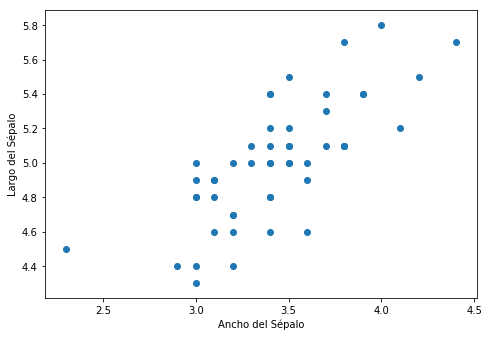

In [9]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.scatter(setosa_sepal_width, setosa_sepal_length)
ax.set_xlabel('Ancho del Sépalo')
ax.set_ylabel('Largo del Sépalo')
plt.show()

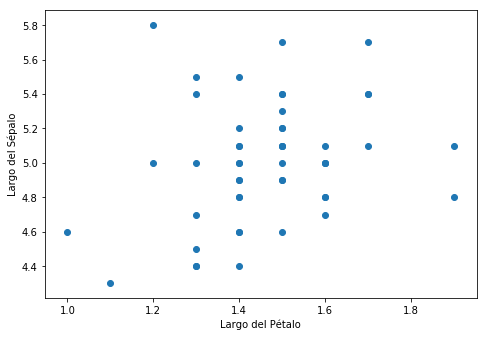

In [10]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.scatter(setosa_petal_length, setosa_sepal_length)
ax.set_xlabel('Largo del Pétalo')
ax.set_ylabel('Largo del Sépalo')
plt.show()

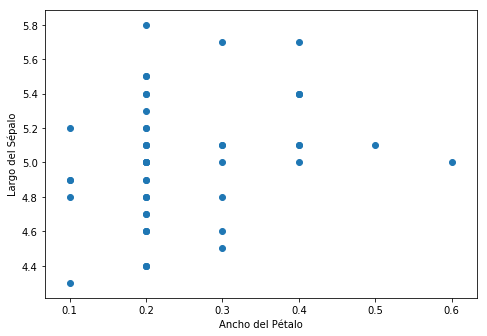

In [11]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.scatter(setosa_petal_width, setosa_sepal_length)
ax.set_xlabel('Ancho del Pétalo')
ax.set_ylabel('Largo del Sépalo')
plt.show()

Visualmente podemos ver que el largo del sépalo parece estar relacionado al ancho del sépalo. Para explorar mejor esta idea vamos a buscar correlaciones. Haremos esto gracias a las funciones que nos provee `pandas`, pero tendremos que cargar los datos como un `DataFrame`:

In [9]:
import pandas as pd

df_setosa = pd.DataFrame(iris_setosa, columns=iris.feature_names)
df_setosa

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


Con pandas podemos también graficar!

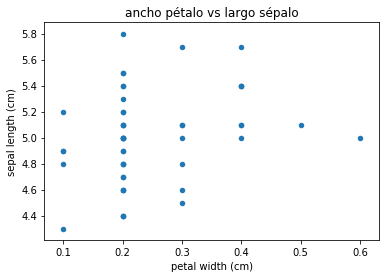

In [12]:
df_setosa.plot.scatter(x='petal width (cm)', y='sepal length (cm)', title= "ancho pétalo vs largo sépalo");

plt.show(block=True);

Ahora usamos el método `corr()` sobre el dataframe para buscar las correlaciones:

In [10]:
corr_matrix = df_setosa.corr()
corr_matrix['sepal length (cm)'].sort_values(ascending=False)

sepal length (cm)    1.000000
sepal width (cm)     0.742547
petal width (cm)     0.278098
petal length (cm)    0.267176
Name: sepal length (cm), dtype: float64

Aquí encontramos un resultado muy interesante. La correlación entre el ancho y el largo del sépalo es bastante alta. Por lo tanto, vamos a hacer una regresión lineal que en el eje $X$ tiene el ancho del pétalo y en el eje $Y$ tiene el largo.

## Entrenando y probando nuestro modelo

Tenemos 50 registros que nos indican el ancho y largo del sépalo (la verdad no son tantos, pero para está actividad va a estar bien). Así que haremos algo muy común en el área de *Machine Learning*: vamos a separar nuestros datos en un set de entrenamiento y un set de prueba. 

La idea es escoger aleatoriamente un pequeño grupo de datos y lo vamos a separar. Este será nuestro set de prueba. Los otros datos, que sería el set de entrenamiento, lo vamos a utilizar para hacer la regresión lineal (es decir, encontrar la recta que que se ajusta mejor). Luego, para cada ancho de sépalo del set de prueba, vamos a "predecir" su largo con la regresión. Como conocemos la respuesta correcta, vamos a ir calculando el *mean squared error* para nuestro programa. Para esto vamos a usar una función de la librería `scikit-learn`.

In [15]:
from sklearn.model_selection import train_test_split

# La primera columna es el largo del sépalo y la segunda el ancho del sépalo
setosa_sepal_data = iris_setosa[:, [True, True, False, False]]

# Queremos un set de prueba del 15% del tamaño
train_set, test_set = train_test_split(setosa_sepal_data, test_size=0.15)

Primero imprimiremos el set de entrenamiento:

In [16]:
train_set

array([[5.3, 3.7],
       [4.6, 3.1],
       [4.4, 2.9],
       [5. , 3.6],
       [5.4, 3.4],
       [5. , 3.2],
       [5.1, 3.7],
       [5.1, 3.8],
       [5.7, 4.4],
       [5.1, 3.5],
       [4.3, 3. ],
       [4.9, 3.6],
       [4.8, 3.4],
       [5. , 3.4],
       [5.1, 3.3],
       [4.5, 2.3],
       [5. , 3. ],
       [5. , 3.3],
       [4.9, 3.1],
       [5. , 3.5],
       [4.8, 3.1],
       [4.9, 3. ],
       [5.4, 3.4],
       [4.6, 3.6],
       [5.1, 3.4],
       [4.9, 3.1],
       [5.1, 3.8],
       [5.4, 3.9],
       [4.4, 3. ],
       [5.2, 4.1],
       [5.7, 3.8],
       [5.5, 4.2],
       [5. , 3.5],
       [4.6, 3.2],
       [4.7, 3.2],
       [4.7, 3.2],
       [5.2, 3.5],
       [4.6, 3.4],
       [5.1, 3.5],
       [4.8, 3.4],
       [5.8, 4. ],
       [5.4, 3.7]])

Y ahora el test de prueba, que notamos que es de tamaño 0.15 respecto al *dataset* original.

In [17]:
test_set

array([[4.8, 3. ],
       [5.2, 3.4],
       [5.4, 3.9],
       [4.8, 3. ],
       [5.5, 3.5],
       [5. , 3.4],
       [4.4, 3.2],
       [5.1, 3.8]])

Ahora llegamos al momento de la verdad: **vamos a entrenar un modelo de regresión lineal usando `scikit-learn`**. Obviamente hay formas matemáticas de calcular una regresión lineal, pero veremos que cuando los datos son muchos conviene usar técnicas diferentes. `scikit-learn` sabe manejar todo esto por debajo, pero más importante aún es que entiendas la `interfaz` de esta librería.

En general, vamos a importar algún modelo de los que ya tiene implementados, enseñarle los datos de prueba como un par $X$, $Y$, donde $X$ son los *input* (en este caso el ancho del sépalo) e $Y$ las respuestas para esos *inputs*. Para "enseñarle" al modelo usaremos la función `fit` y luego para predecir la función `predict`.

In [18]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

# Preparamos un arreglo con el largo del sépalo y otro con el ancho
sepal_length_train = train_set[:, [True, False]]
sepal_width_train = train_set[:, [False, True]]

# Pasamos como primer parámetro el ancho (input)
# y como segundo el largo (respuesta)
lin_reg.fit(sepal_width_train, sepal_length_train)

LinearRegression()

Muy bien, hemos entrenado nuestro modelo! Ahora vamos a hacer una predicción sobre él. Preguntémosle la medida del largo del sépalo para un ancho de 5 cm:

In [19]:
lin_reg.predict([[5]])

array([[6.07883795]])

La respuesta es 6.08 cm, que suena bastante razonable. Aquí hay que hacer una acotación: el parámetro de la función predict es una lista de listas (o arreglo de arreglos), esto es porque podemos pasar hartos *inputs* a la vez, y cada uno de estos tiene más de una dimensión. En este caso estamos entregando solamente un *input* de dimensión 1. Ahora agreguemos la recta al gráfico para ver si hace sentido: 

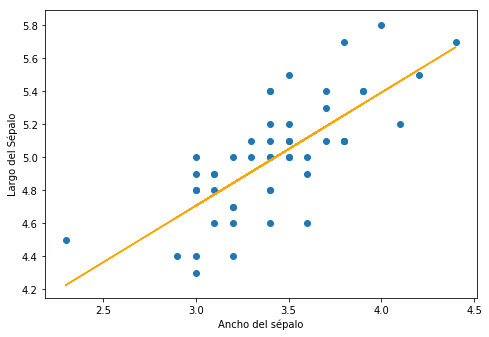

In [20]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.scatter(setosa_sepal_width, setosa_sepal_length)

# Estamos graficando una recta que en el eje X tiene el arreglo setosa_sepal_width
# Y en el eje Y agregamos las predicciones para esos valores de X
plt.plot(setosa_sepal_width, lin_reg.predict(setosa_sepal_width), color="orange")

ax.set_xlabel('Ancho del sépalo')
ax.set_ylabel('Largo del Sépalo')
plt.show()

Ahora usaremos nuestros datos de prueba para entender que tan correcta es nuestra predicción. Para esto vamos a predecir los largos para cada ancho de prueba, y dado que conocemos las respuestas, calcularemos el error medio cuadrado con la función `mean_squared_error` que ya está incluida en `scikit-learn`:

In [22]:
from sklearn.metrics import mean_squared_error

# Separamos el lancho del largo del sépalo en los datos de prueba
sepal_length_test = test_set[:, [True, False]]
sepal_width_test = test_set[:, [False, True]]

# Predecimos sobre todos los input y mostramos los resultados
length_predictions = lin_reg.predict(sepal_width_test)
length_predictions

array([[4.70463753],
       [4.97947761],
       [5.32302772],
       [4.70463753],
       [5.04818763],
       [4.97947761],
       [4.84205757],
       [5.2543177 ]])

In [23]:
# Ahora calculamos el error medio cuadrado
lin_mse = mean_squared_error(sepal_length_test, length_predictions)
lin_mse

0.0620659109739909

Para darle más significado a esta respuesta vamos a sacar la raíz cuadrada de este valor:

In [24]:
import numpy as np

np.sqrt(lin_mse)

0.24913030922388968

Esto nos dice que en promedio estamos desviados 0.24 centímetros en nuestras predicciones. Nada mal considerando el rango en el que se mueven los largos de los sépalos.

## Una mejor forma de evaluar: *Cross-Validation*

Una forma muy recurrente de evaluar algoritmos de *Machine Learning* es usar *Cross-Validation*. La idea es dividir los datos en $X$ partes aleatorias. Luego, cada una de estas partes va a actuar como set de prueba, mientras las $X-1$ partes restantes actuarán como set de entrenamiento. Así, vamos a tener $X$ puntajes distintos. Aquí podemos tener una idea mucha más clara de la *performance* de nuestro modelo.

In [25]:
from sklearn.model_selection import cross_val_score

#Instanciamos un modelo
lin_reg = LinearRegression()

# Volvemos a considerar todas las Iris Setosa
sepal_length = setosa_sepal_data[:, [True, False]]
sepal_width = setosa_sepal_data[:, [False, True]]

# No sirve como parámetro mean_squared_error
scores = cross_val_score(lin_reg, sepal_width, sepal_length, scoring='neg_mean_squared_error', cv=8)
lin_rmse_scores = np.sqrt(-scores)
lin_rmse_scores

array([0.19892843, 0.22941432, 0.29391412, 0.32387882, 0.21631628,
       0.25585974, 0.25942648, 0.15685852])

Finalmente, veamos el promedio y la desviación estándar de estos resultados:

In [26]:
print(lin_rmse_scores.mean())
print(lin_rmse_scores.std())

0.24182458931439554
0.04977076296597961


## ¿Y ahora cómo sigo?

En este *Notebook* dimos una introducción simple a *Machine Learning* pero que a la vez te permite seguir aprendiendo por tu cuenta. La interfaz de SciKit Learn que utiliza `fit`- `predict` es ampliamente conocida y seguramente vas a encontrar mucha documentación en internet que te va a permitir seguir aprendiendo sobre el tema.

Quizás lo más importante a tener en cuenta es que no todo problema necesita herramientas sofisticadas de Machine Learning. Quizás una solución menos compleja funcione igual de bien que un algoritmo más sofisticado que te va a tomar más tiempo de desarrollar (por ejemplo, la recolección de datos y la forma de serializarlos siempre es un problema muy complejo!). Además la solución estándar puede servir como baseline para que compares respecto a la solución sofisticada. *Siempre hay que partir por la solución no-inteligente.*

Finalmente, te dejamos una bibliografía que te será de mucha utilidad para seguir por tu cuenta.

## Bibliografía

- Hands-On Machine Learning with Scikit-Learn, Keras & TensorFlow (Aurélien Géron). Este es un muy buen libro que explica cómo hacer todas estas cosas utilizando herramientas relacionadas con Python. Incluso tiene una muy buena sección de Redes Neuronales.
- Machine Learning (Peter Flatch). Este libro habla sobre los modelos estándar de *Machine Learning* desde un punto de vista más teórico, pero bien amigable.
- Foundations of Machine Learning (Afshin Rostamizadeh, Ameet Talwalkar & Mehryar Mohri). Este libro te cuenta toda la teoría detrás de los modelos, pero es bien espeso. Si realmente te gusta la teoría y las demostraciones espesas, puedes consultarlo.
- [Towards Data Science](https://towardsdatascience.com/). Este blog de Medium tiene muy buen material sobre el tema. Cuando encuentres un tutorial acá, date el tiempo de leerlo y programarlo tú. Puedes intrusear y ver qué cosas de interés encuentras.
- [Los videos de redes neuronales de 3Blue1Brown](https://www.youtube.com/playlist?list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi). Esta serie de videos explica de una forma muy amigable lo que es una red neuronal. Sirven para entender que realmente esto no es complejo y que con lo que sabemos podemos empezar a crear nuestras propias herramientas.
- Una vez que conoces los conceptos y vayas manos a la obra, no te olvides de tus buenos amigos Google y StackOverflow.